In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Terminology

- Classification: predict a class (cat, dog, etc.)
- Regression: predict a number (price, height, etc.)

$\square$

- Model parameter: learning during training (weights in ANN, etc.)
- Hyperparameter: setup parameter specified by human, fixed during training (k in KNN, ANN design, etc.)

$\square$

- Overfitting: model is too complex (high training score, low test score) -> solve with regularization or by getting more training data
- Underfitting: model is too simple for the complexity of the data (low training and test score) -> solve with more complex model

$\square$

- Training set: model fitting
- Validation set: hyperparameter optimization
- Test set: evaluation

$\square$

- Curse of dimensionality: exponentionally more data is needed for every added dimension (feature)
- Blessing of non-uniformity: most real world data is non-uniform (pictures, endless possibilities but effectively the are all pretty near to each other featurewise)
- Heavily effects algorithms that are based on distance calculations (kNN, SVM, etc.)

$\square$

- Parametric model: fixed set of parameters, more data -> not more complex to learn (ANN, liniear models, etc.)
- Non-parametric model: number of parameters grow with amount of data (trees, kNN, SVM, etc.)

$\square$

- Label imbalance: credit card example: millions of valid transactions, few fradulent transactions; needs downsampling in order to be detectable/learnable

$\square$

- Vector 1D ($\textbf{x}$)
- Matrix 2D ($\textbf{X}$) ($n \times p$ matrix represents $n$ datapoints in a $p$-dimensional space)
- Tensor nD ($\textbf{T}$)

$\square$

- Discriminative: Can classify
- Generative: Can classify but can also generate new (fake) datapoints that are likely

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/06_discriminative_generative.png" width="300">

$\square$

- Bias/Variance
- Bias: [Training set related] Inability to capture the true relationship ["falsches Vorurteil"] (large bias = does *not* capture the true relationship well / little bias = does capture the true relationship well)
- Variance: Difference in fits between data sets (training and test) (large variance = does *not* generalize well / little variance = does generalize well)
- Overfitting: little bias, high variance [squiggly line example in linear regression] -> variance reduction: bagging
- Underfitting: large bias, low variance [straight line example in linear regression] -> bias reduction: boosting
- Ideal: little bias, little variance
- When a model has low variance, it is called "stable"

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/03_bias_variance.png" alt="ml" style="width: 100"/>
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/03_Bias-Variance-Tradeoff.png" alt="ml" style="width: 100"/>


# Various Notes

## Python

### Argsort Parallel Arrays in Reverse

In [5]:

first = np.array([3, 10, 2, 5, 8, 7])
second = np.array(["three", "ten", "two", "five", "eight", "seven"])
args_sorted = np.argsort(first)[::-1]
first = np.array(first)[args_sorted]
second = np.array(second)[args_sorted]
print(first)
print(second)

[10  8  7  5  3  2]
['ten' 'eight' 'seven' 'five' 'three' 'two']


### Matplotlib Figure

Colormap: https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [ ]:
fig.tight_layout()

## Covariance Matrix

In [3]:
# Zwei Parameter, z.B. Arbeitsweg (km) und benötigte Zeit (Minuten)
m = np.array([[21,10,54,33,65],[15,8,35,24,42]])
print(m)

# Kovarianzmatrix: Diagonale 0,1 und 1,0 zeigt, dass die beiden
# Werte linearabhängig sind, weil positiv. Beide Werte sind immer gleich.
print(np.cov(m))

# 0,0 und 1,1 entsprechen der Varianz der einzelnen beiden Listen
print(np.var([15,8,35,24,42], ddof=1))

# Die Varianz ist das Quadrat der Standardabweichung
print(np.var([15,8,35,24,42], ddof=0)**0.5)
print(np.std([15,8,35,24,42]))

# ddof ist "degrees of freedom"

[[21 10 54 33 65]
 [15  8 35 24 42]]
[[518.3  317.15]
 [317.15 194.7 ]]
194.7
12.480384609458156
12.480384609458156


<img src="img02.png" width="500">

*Example for positive correlation*

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)


Model:
$$f_\textbf{w}(\textbf{X}) = \sum_{i=1}^{p}w_i \cdot x_i + w_0$$

Loss:
$$\underset{\textbf{w}}{\mathrm{argmin}} \: \mathcal{L}(f_\textbf{w}(\textbf{X}))$$

$$\mathcal{L}_{SSE} = \sum_{n=1}^{N} (y_n-\hat{y}_n)^2 = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2$$ 

- Standard loss function: SSE (sum of squared errors)
- Very fast
- Features can be augmented with polynomials to generalize to non-linear pattern
- Convex -> local minimum = global minimum
- Assumption is that errors follow normal distribution
- Closed form: exact mathematical calculation to find the weights instead of gradient descent
- Use gradient descent (closed form mathematical solution is too slow with many features)

Gradient descent:

$$\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L}(\mathbf{w}^s) = \mathbf{w}^s-\frac{\eta}{n} \sum_{i=1}^{n} \nabla \mathcal{L_i}(\mathbf{w}^s)$$

- Walk in opposite direction of gradient (stepsize: gradient times learningrate eta)
- Stochastic gradient descent: do not calculate loss for all points, just select a random point -> much faster: $\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L_i}(\mathbf{w}^s)$
- Minibatch stochastic gradient descent: use a random set of points to calculate loss

Hyperparameters:
- Learning rate (too small: no convergence / too large: overshooting, divergence)
- Number of iterations (too small, no convergence / too large: waste of resources)
- Learning rate decay

When overfitting:
- L2 regularization: ridge regression (add penalty for high weights by using the squared weights) with hyperparameter $\alpha$. High $\alpha$ = more penalty. Default is 1.
    - Still convex, closed form solution possible

$$\mathcal{L}_{SSE} + \alpha \sum_{i=1}^{p} w_i^2$$

- L1 regularization: lasso regression (add penalty for high weights by using the absolut value of the weights) also with hyperparameter $\alpha$. 
    - Will cause many weights to be exactly 0 (-> automatic feature selection). Especially the small weight will become 0. Results in sparse models (which is good)
    - Problem: absolute value not differentiable, therefore no closed form solution and cannot use gradient descent

$$\mathcal{L}_{SSE} + \alpha \sum_{i=1}^{p} | w_i|$$

# Linear Classification

Main idea: find hyperplane that separates the classes (decision boundary)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1).fit(X_train, y_train)


Model:

$$ \hat{y} = \textrm{logistic}(f_{\theta}(\mathbf{x})) = \frac{1}{1+e^{-f_{\theta}(\mathbf{x})}} $$


- Transforms the model function $f_{\theta}(\mathbf{x})$ so that we get a probability in the range $[0, 1]$
- Predicts the probabilty that a point belongs to one of the classes
- Decision boundary = $p(0.5)$

Loss (cross-entropy loss function):

$$\mathcal{L_{log}}(\mathbf{w}) = \sum_{n=1}^{N} H(p_n,q_n) = - \sum_{n=1}^{N} \sum_{c=1}^{C} p_{n,c} log(q_{n,c}) $$

True probabilities $p$ (0 or 1) and predicted probabilities $q$ over $N$ instances and $C$ classes: loss grows exponentially as difference between $p$ and $q$ increases

Binary case (C=2): $\mathcal{L_{log}}(\mathbf{w}) = - \sum_{n=1}^{N} \big[ y_n log(\hat{y}_n) + (1-y_n) log(1-\hat{y}_n) \big]$

- Can also be regulated with L1 or L2

### Cross entropy (aka log loss)

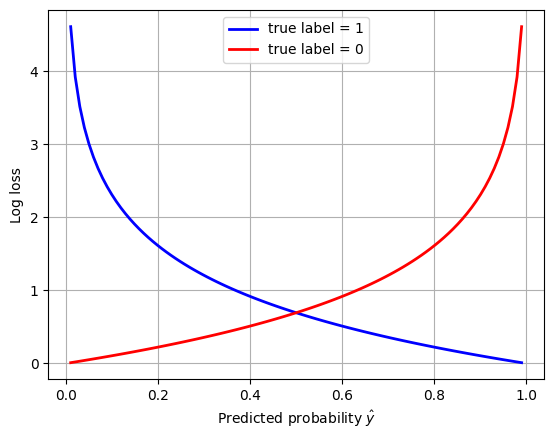

In [22]:
def cross_entropy(yHat, y):
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)

fig, ax = plt.subplots()
x = np.linspace(0.01,0.99,100)

ax.plot(x,cross_entropy(x, 1),lw=2,c='b',label='true label = 1', linestyle='-')
ax.plot(x,cross_entropy(x, 0),lw=2,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Predicted probability $\hat{y}$")
ax.set_ylabel("Log loss")
plt.grid()
plt.legend();

### Regularization

Use parameter C, like in support vector machines, smaller values specify stronger regularization.

## Support Vector Machines (SVM)

In [1]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # or svm.LinearSVC
clf.fit(X, Y)
print("Support vectors:", clf.support_vectors_[:])
print("Coefficients:", clf.dual_coef_[:])

NameError: name 'X' is not defined

- SVC = Support Vector Classifier

- Primal: learns a set of weights $w_i$ (good when we have lots of datapoints)
- Dual: learns a set of coefficients $a_i$ (dual coefficients = Lagrange multipliers - alternative form of the optimization problem with the contstraint represented differntly; the weights assigned to each support vector )

Others available:
- LinearSVC = Allows choosing between primal and dual; faster for large datasets
- SVR = Support Vector Regression (for regression)


<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/05_margin.png" alt="ml" style="width: 1250px;"/>

- Maximize margin between classes
- Samples closest to the separating hyperplane: support vectors
- Soft margin relaxation with parameter $C$ (penalty for crossing the margin):
    - Large $C$: less support vectors (points inside the margin), smaller margin, leads to overfitting
    - Small $C$: more support vectors, bigger margin, underfitting

Note: the **dot/scalar product** of two vectors shows how near they are (used to compare two datapoints)

In [70]:
for x in np.linspace(0, 2*np.pi, num=12+1):
    a = np.array([np.cos(x), np.sin(x)])
    dot = np.dot(np.array([1,0]), a)
    print(f"b = [1, 0]  a = [{a[0]:5.2f}, {a[1]:5.2f}]  dot product: {dot:5.2f}")

b = [1, 0]  a = [ 1.00,  0.00]  dot product:  1.00
b = [1, 0]  a = [ 0.87,  0.50]  dot product:  0.87
b = [1, 0]  a = [ 0.50,  0.87]  dot product:  0.50
b = [1, 0]  a = [ 0.00,  1.00]  dot product:  0.00
b = [1, 0]  a = [-0.50,  0.87]  dot product: -0.50
b = [1, 0]  a = [-0.87,  0.50]  dot product: -0.87
b = [1, 0]  a = [-1.00,  0.00]  dot product: -1.00
b = [1, 0]  a = [-0.87, -0.50]  dot product: -0.87
b = [1, 0]  a = [-0.50, -0.87]  dot product: -0.50
b = [1, 0]  a = [-0.00, -1.00]  dot product: -0.00
b = [1, 0]  a = [ 0.50, -0.87]  dot product:  0.50
b = [1, 0]  a = [ 0.87, -0.50]  dot product:  0.87
b = [1, 0]  a = [ 1.00, -0.00]  dot product:  1.00


# Kernelization

What is a kernel?

A kernel is a function that calculates the similarity between pairs of data points in a higher-dimensional space. It is used to transform data into a higher-dimensional space, making it easier to classify or analyze. Kernels are very efficient because we don't have to calculate the transformation to higher-dimension space for the whole feature space.

- Kernelization in general: Make linear model non-linear
- Feature maps: Add non-linear transformations of features (example: polynomial feature map) [sklearn PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) -> very expensive (also more weights, more likely overfitting)
  - Example: Add squared feature $x^2$ -> points close to zero will not change much (ie remain close to 0) but points far away from zero will change a lot (adding a dimension in order to make a linear classification boundary)
- Kernel trick: don't transform all features, just calculate the distances using the transformation kernel

## Kernel trick example

_Quadratic_ feature map for $\mathbf{x} = (x_1,..., x_p )$:

$$ \Phi(\mathbf{x}) = (x_1,..., x_p , x_1^2,..., x_p^2 , \sqrt{2} x_1 x_2 , ..., \sqrt{2} x_{p-1} x_{p}) $$

A _kernel function_ exists for this feature map to compute dot products

$$ k_{quad}(\mathbf{x_i},\mathbf{x_j}) =  \Phi(\mathbf{x_i}) \cdot \Phi(\mathbf{x_j}) =  \mathbf{x_i} \cdot \mathbf{x_j} + (\mathbf{x_i} \cdot \mathbf{x_j})^2$$

Skip computation of $\Phi(x_i)$ and $\Phi(x_j)$ and compute $k(x_i,x_j)$ directly

$\square$

- A kernel is a dot product in higher space (a similarity measurement in higher space)
- $\mathcal{H}$ is the *reproducing kernel Hilbert space* (RKHS)
- The dot product is a meaure of similarity between the input vectors
- If there is a loss function based on dot products, in can be kernelized -> replace dot product with kernelized dot product $k(\textbf{x}_i, \textbf{x}_j)$
- A Mercer kernel is any function $k: X \times X \rightarrow \mathbb{R}$ with the properties symmetry $k(\mathbf{x_1},\mathbf{x_2}) = k(\mathbf{x_2},\mathbf{x_1})$ and the kernel matrix (matrix of all possible combinations of features) is positive semi-definite ($\ge 0$)

## Kernels

- Linear kernel: it just uses the feature map $\Phi(\mathbf{x}) = \mathbf{x}$ -> it does nothing
  - $ k_{linear}(\mathbf{x_i},\mathbf{x_j}) = \mathbf{x_i} \cdot \mathbf{x_j}$
- Polynomial kernel: reproduces the polynomial feature map
    - $\gamma$ is a scaling hyperparameter (default $\frac{1}{p}$) ($p$ = number of features)
    - $c_0$ is a regularization hyperparameter (default 1) to trade off influence of higher-order terms ($c_0$ lower = more emphasis on lower order terms $x^2$ etc. / $c_0$ higher = more emphasis on higher order terms $x^d$ etc.)
    - $k_{poly}(\mathbf{x_1},\mathbf{x_2}) = (\gamma (\mathbf{x_1} \cdot \mathbf{x_2}) + c_0)^d$
- RBF (Gaussian) kernel *Radial Basis Function*
    - $k_{RBF}(\mathbf{x_1},\mathbf{x_2}) = exp(-\gamma ||\mathbf{x_1} - \mathbf{x_2}||^2)$ (exp of gamma times the difference between two points squared, it does not use a dot product)
    - It's a local kernel, it only influences data points nearby (this is in contrast to the linear and polynomial kernel, those are global)
    - Gamma high: narrow Gaussian, more support vectors, overfitting / gamma low: wide Gaussian, underfitting
    - C high: narrow margin, overfitting / C low: wider margins, underfitting
- Sigmoid Kernel


General advice:
- Find a good C, then finetune gamma
- values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale `np.logspace(-15, 15, base=2, num=3)`
- Data needs to be scaled to the same scale
- Especially good at small, high-dimensional data
- sklearn: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- Representer theorem: other loss functions can also be kernelized if they meet certain criteria

# Model Selection & Evaluation

- Feedback loop: (problematic) Example disease detection; when the model is really good, the disease might dissapear and so the data gets changed -> model might not fit and detect the disease any more

$\square$


- Holdout: train-test split, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
  - Also use holdout if dataset is too large and certain % of the samples is representative
- K-fold cross-validation: evaluate with different splits, split data into k equal-sized folds, see https://scikit-learn.org/stable/modules/cross_validation.html
  - Evaluate mean score and mean variance (std) to see how sensitive (unstable) models are (to make more stable, regularize or get more data)
  
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=400>

- Stratified K-fold CV: stratified means proportions between classes are conserved in each fold (exampl: we have 5% of a particular class, so every fold also gets 5%) -> safe to be always used
- Leave one out CV: k fold with k equal to the number of samples (100 samles -> 100 folds each with 99 training and 1 test entry)
  - Only for small datasets
- Bootstrap (sample n datapoints with replacement as traing set), ie. the same sample could appear in multiple training sets
  - Use the unsampled (out-of-bootstrap) samples as test set
  - Repeat k times to get k number of scores


$\square$

- Large dataset: holdout
- Small dataset (<100 samples): leave-one-out
- If grouping in data: leave-one-subject-out (grouping)
- If time series: train-then-test

## Metrics

Confusion matrix code: `Lab 3 - Ensembles.ipynb` and `Lab 2b - Model Selection.ipynb`

### Binary Classification

- False positive: type I error
- False negative: type II error

Depending on the usecase, the importance of those is different

Confusion matrix:

| | Predicted Neg | Predicted Pos |
|-|-|-|
| Actual Neg | TN | FP |
| Actual Pos | FN | TP |

- Accuracy: how close is the prediction to the ground truth: $\frac{\text{correct predictions}}{\text{all predictions}} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$
  - Not good when dataset is imbalanced (credit card fraud example - when only 0.01% are frauds, those are not detected even when accuracy is 99.9%)
- Precision: use when the goal is to limit FPs: $\frac{\text{TP}}{\text{TP} + \text{FP}}$
  - "How many selected items are relevant?"
  - Example: search engines, avoid bad search results / clinical trials: only test drugs that really work
- Recall (aka sensitivity aka true positive rate TPR): use when the goal is to limit FNs: $\frac{\text{TP}}{\text{TP} + \text{FN}}$
  - "How many relevant items are selected?"
  - Example: cancer diagnosis, don't want to miss a disiease / search engines: don't want to omit important hits
- F1-score: trades off precision and recall, optimizes both: $2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$

### Multi-class Classification

- Train models *per class*: one class is positive, others are negative, then average

### Probabilistic

- Decision function (`decision_function`): higher abs(value) -> more confidence
- Some models also return a probability values (`predict_proba`)

### Curves

Implementation: `Lab 2b - Model Selection.ipynb`

- Precision recall curve (plot of precision against recall), always a tradeoff, cannot have both
  - AUC: Area under curve (desired: as big as possible)
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
- Receiver Operating Characteristics (ROC): trade off true positive rate $\textit{TPR}= \frac{TP}{TP + FN}$ with false positive rate $\textit{FPR} = \frac{FP}{FP + TN}$
  - Compares the TPR (recall) with FPR
  - Random guessing or always predicting majority class give a 0.5 AUC (diagonal bottomleft to topright) -> model must be better
  - AUC: Area under curve (desired: as big as possible)
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

Both curves help to optimize the threshold value. Make predictions based on an adjusted threshold:
``` python
# Train the model with probability=True
model = SVC(probability=True).fit(X_train, y_train)

# Calculate probabilities for the positive class
probabilities = model.predict_proba(X_test)[:, 1]

# Set your own threshold
custom_threshold = 0.2

# Assign the class based on the probability
y_pred = (probabilities > custom_threshold).astype(int)
```

### Regression Metrics

- Mean squared error (sensitive to outliers): $\frac{\sum_{i}(y_{pred_i}-y_{actual_i})^2}{n}$
- Mean absolute error (less sensitive to outliers): $\frac{\sum_{i}|y_{pred_i}-y_{actual_i}|}{n}$

Problem of the above two: unbounded (lowest value is 0, larges value is infinite -> difficult to interpret), therefore:

- R-squared $R^2$: $1 - \frac{{\sum_{i}(y_{pred_i}-y_{actual_i})^2}}{{\sum_{i}(y_{mean}-y_{actual_i})^2}}$
  - "How much better is the model compared to just predicting the mean?" (relative performance measure)
  - Between 0 and 1 usually; 0 = as good as predicting the mean / 1 = perfect predictions / negative = worse than the mean prediction ("higher is better")

Visualizing regression errors:

- Prediction plot (x-axis: true value, y-axis: predicted value -> should optimally be a line from bottomleft to topright)
- Residual plot (x-axis: true value, y-axis: true minus predicted value -> should optimally be a horizontal line)

## Summary Flowchart

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/03_Bias-Variance-Flowchart.png" alt="ml" style="width: 150"/>

## Hyperparameter Tuning

- GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
  - Doesn't scale to many hyperparameters
- Random Search (randomly try hyperparametervalues): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
  - Better, especially when some hyperparameters are less important


### Nested Cross-Validation

In [ ]:
hps = {'C': expon(scale=100), 'gamma': expon(scale=.1)}
scores = cross_val_score(RandomizedSearchCV(SVC(), hps, cv=3), X, y, cv=5)

# Ensemble Learning

Multiple models, vote on the prediction.

- Hard vote: majority wins
- Soft vote: sum up the probabilites for each class, then highest wins (could also add weight to classes if one is more important)

Why does it work?

- Different models may be good at different parts of data
- Individual mistakes can be averaged out

$\square$

- Underfit (high bias, low variance) -> combine with other low variance models. Bias reduction: boosting
- Overfit (low bias, high variance) -> combine with other low bias models. Variance reduction: bagging

## Decision Trees

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- MachLe_Lecture04_HS2023.pdf
- Split leaves recursively by tring to get leaves as pure as possible (loss function is impurity measure, gini for example or entropy, p. 15)
  - Stop condition: either when leaves are pure (only one class) or by conditions like maxdepth, min number of elements per node

Gini example: a node has 3 positive and 2 negative elements: +++ and --. $p_+$ is $\frac{3}{5}$ and $p_-$ is $\frac{2}{5}$. Gini index is $\frac{3}{5} \cdot \frac{2}{5} + \frac{2}{5} \cdot \frac{3}{5}$ (product plus the product of the opposite).

$Gini(X_{l}) = \sum_{c\neq c'} \hat{p}_c \hat{p}_{c'}$

-> Chose the split that gets the biggest reduction in Gini index (or entropy)

- Feature that split the tree (especially higher up) are the important features -> but better use this from a RandomForest to get a good meaningful result for feature importance.

$\square$

- Shallow trees tend to underfit -> use boosting
- Deep trees tend to overfit -> use bagging

## Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- Randomly do not consider all the features in order to determine the split (number of features to consider as defined by `max_features`)
- Results in highly randomized trees with high variance, good for bagging

Out-of-bag (OOB): Samples that have not yet been used. We don't need a train/test split but can use OOB instead (with some bookkeeping). OOB is usually about 33% of the data (`oob_score_`)

## Bagging (Bootstrap Aggregating)

- Take a number of bootstrap samples (*bootstrap*) into a bag and train a model
- Do this multiple times to get multiple models
- Let each model predict and take the average of the predictions (*aggregating*)

Besides for decision trees, it could also be used for deep neural networks

## Adaptive Boosting (AdaBoost)

- MachLe_Lecture04_HS2023.pdf p. 50
- Increase weight of misclassified instances (give higher importance to samples where the model makes mistakes, meaning those samples are much more likely to be picked for the next bag of data that is used for the next training cycle), start with same weight for all samples $\frac{1}{n}$ with $n$ being the number of samples
- Used on decision stumps: trees with only one split, ie. minimal depth (weak learners)
- Boosting is an addition to bagging, instead of randomly chosing samples, we use the weights to influence the selection

Algorithm:
- Input: Training data (positive, negative) with weights
- Foreach trainingcycle:
  - Train a weak classifier on a selection (bag) of data, probability to pick samples based on their weight
  - Classify training data
  - Increase weight on incorrectly classified samples

Bagging / Boosting pros and cons MachLe_Lecture04_HS2023.pdf p. 57

# Data Preprocessing

## Scaling

Scaling is important for all algorithms that compute distances (example: kNN, SVM). Features with large scales will "eliminate" features with small scales.

- [StanardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Standardize features by removing the mean and scaling to unit variance (scale around 0):
  - Works best if data is distributed more or less close to Gaussian
$$\textbf{x}_{new} = \frac{\textbf{x}-\mu}{\sigma}$$
- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html): Transform features by scaling each feature to a given range (default is range [0,1]):
  - Default: min = 0, max = 1
  - The part before the $\cdot$ is scaling to [0, 1]
  - The part after the $\cdot$ is the scaling to the range [min, max]
$$\textbf{x}_{new} = \frac{\textbf{x}-x_{min}}{x_{max}-x_{min}}\cdot(max-min)+min$$

- [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html): Half of the points below 0, other half above 0 (subtracts the median and scales the data according to the quantile range)

## Categorical Feature Encoding

Numeric representation of categories.

### Ordinal encoding

Just assign each category a number. Only makes sense if data has an ordinal (orderable) hierarchy, see one-hot encoding below for the reason why:

### One-hot encoding

- Matrix used to encode categorical data:
    - Row: Sample
    - Column: Category (features, ie. create a feature for each category)
    - Value 1 where sample is in category of that column
- If the categorical data has no order, using an ordinal number ("aufsteigende Laufnummer") to represent the category would not make sense because that would result in wrong distance calculations:
    - Example: Winterthur 1, Basel 2, Zürich 3 -> distance between Winterthur and Zürich is in reality not bigger than distance between Winterthur and Basel
    - Therefore: use one-hot encoding

Problems:
- Can explode if a feature hat lots of values (-> high dimensionality, making everything complex to process)

### Target encoding

Value close to 1 if category correlates with class 1, value close to 0 if category correlates with class 0.


## Applying Data Transformation

- Fit-predict paradigm:
    - Fit the transformer on the training data only
    - Transform the training data, then train
    - Transform the test data, then evaluate the model
- Only scale input features (X), not the targets (y)
- Fitting and transforming the whole dataset before splitting would be data leakage (because we have looked at the test data before training)
- Fitting and transforming the training and test data separately would distrort the data

In [ ]:
# choose scaling method and fit on training data
scaler = StandardScaler()
scaler.fit(X_train) # learns mu and sigma

# transform training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# calling fit and transform in sequence
X_train_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_train_scaled = scaler.fit_transform(X_train)

### Pipelines

Transformers (multiple if desired) and one classifier:

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/07_pipelines.png" width="600">

In [ ]:
# Make pipeline, step names will be 'minmaxscaler' and 'linearsvc'
pipe = make_pipeline(MinMaxScaler(), LinearSVC())
# Build pipeline with named steps 
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", LinearSVC())])

# Correct fit and score
score = pipe.fit(X_train, y_train).score(X_test, y_test)
# Retrieve trained model by name
svm = pipe.named_steps["svm"]

# Correct cross-validation
scores = cross_val_score(pipe, X, y)

## Automatic Feature Selection

"Reduce the number of features to only select the most useful ones"

Why?

- Simpler models that generalize better
- Faster prediction and training
- Easier data collection, smaller models (less storage)
- Models are better understandable

### Unsupervised feature selection

- Variance-based
  - Remove near constant features
  - Remove features with small variance (they don't change the result that much)
- Covariance-based
  - Remove correlated features

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Get bike sharing data from OpenML
bikes = fetch_openml(data_id=42713, as_frame=True)
X_bike_cat, y_bike = bikes.data, bikes.target

# Optional: take half of the data to speed up processing
X_bike_cat = X_bike_cat.sample(frac=0.5, random_state=1)
y_bike = y_bike.sample(frac=0.5, random_state=1)

# One-hot encode the categorical features
encoder = OneHotEncoder(dtype=int)
preprocessor = ColumnTransformer(transformers=[('cat', encoder, [0,7])], remainder='passthrough')
X_bike = preprocessor.fit_transform(X_bike_cat,y_bike)

# Add 2 random features at the end
random_features = np.random.rand(len(X_bike),2)
X_bike = np.append(X_bike,random_features, axis=1)

# Create feature names
bike_names = ['summer','winter', 'spring', 'fall', 'clear', 'misty', 'rain', 'heavy_rain']
bike_names.extend(X_bike_cat.columns[1:7])
bike_names.extend(X_bike_cat.columns[8:])
bike_names.extend(['random_1','random_2'])

/Users/luzian/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


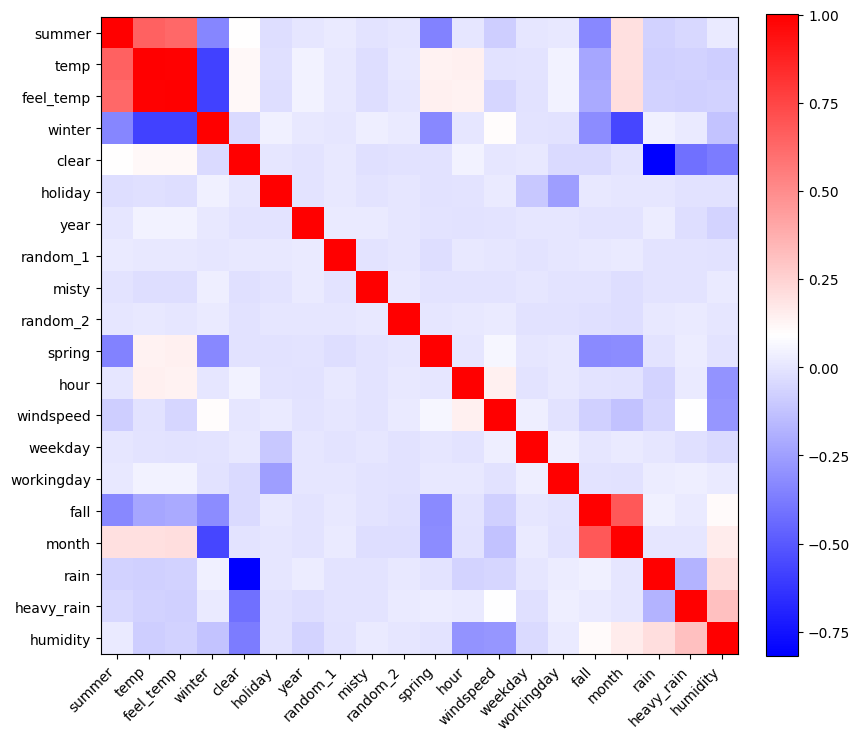

In [12]:
from sklearn.preprocessing import scale
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

fig_scale = 3

X_bike_scaled = scale(X_bike)
cov = np.cov(X_bike_scaled, rowvar=False)

order = np.array(hierarchy.dendrogram(hierarchy.ward(cov), no_plot=True)['ivl'], dtype="int")
bike_names_ordered = [bike_names[i] for i in order]

plt.figure(figsize=(3*fig_scale, 3*fig_scale))
plt.imshow(cov[order, :][:, order], cmap='bwr')
plt.xticks(range(X_bike.shape[1]), bike_names_ordered, ha="right")
plt.yticks(range(X_bike.shape[1]), bike_names_ordered)
plt.xticks(rotation=45)
plt.colorbar(fraction=0.046, pad=0.04);

### Supervised feature selection

- Univariate statistics (F-test)
  - Check if feature has a stastistically significant linear relationship with the target
  - Only keep those that have a strong relationship (or the k best ones)
  - (This method cannot detect correlations)
- Model-based feature selection
  - Use a tuned supervised model to judge the importance of each feature (this can be a different model than the one we use for the final modelling)
    - Linear models: Ridge, Lasso, etc.: features with heighest weights (coefficients)
    - Tree-based models: features used in first nodes
- Relief: Model-based selection with kNN
  - Look at kNN distribution: if two groups of features are far away, those are good features / if the are close over overlapping, the are not good

# Bayesian Learning

See also exercise 8

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/06_bayes_rule.png" width="500">


- $P(c|x)$ is the posterior probability of class $c$ given data $x$.  
- $P(c)$ is the _prior_ probability of class $c$: what you believed before you saw the data $x$  
- $P(x|c)$ is the _likelihood_ of data point $x$ given that the class is $c$ (computed from your data)  
- $P(x)$ is the prior probability of the data (_marginal likelihood_): the likelihood of the data $x$ under any circumstance (no matter what the class is) - this parameter is the normalizer to put the result between 0 and 1

### Example: exploding sun
* Let's compute the probability that the sun has exploded
* Prior $P(exploded)$: the sun has an estimated lifespan of 10 billion years, 
  $P(exploded) = \frac{1}{4.38 x 10^{13}}$
* Likelihood that detector lies: $P(lie)= \frac{1}{36}$

$$
\begin{aligned}
P(exploded|yes) &= \frac{P(yes|exploded)P(exploded)}{P(yes)} \\
 &= \frac{(1-P(lie)) P(exploded)}{P(exploded)(1-P(lie))+P(lie)(1-P(exploded))} \\
 &= \frac{1}{1.25226 x 10^{12}}
 \end{aligned}$$
* The one positive observation of the detector increases the probability
* Due to the very small prior the chance still remains small (it is slightly bigger)

### Example: COVID test
* What is the probability of having COVID-19 if a 96% accurate test returns positive? Assume a false positive rate of 4% 
* Prior $P(C): 0.015$ (117M cases, 7.9B people)
* $P(TP)=P(pos|C)=0.96$, and $P(FP)=(pos|notC)=0.04$
* If test is positive, we can do it again and the prior now becomes $P(C)=0.268$. So the 2nd positive test results in: $P(C|pos)=0.9$

$$
\begin{aligned}
P(C|pos) &= \frac{P(pos|C)P(C)}{P(pos)} \\
 &= \frac{P(pos|C) P(C)}{P(pos|C)P(C)+P(pos|notC)(1-P(C))} \\
 &= \frac{0.96*0.015}{0.96*0.015+0.04*0.985} \\
 &= 0.268
 \end{aligned}$$


## Bayesian Models

Generative models (generate new likely points according to the distribution).

* Learn the joint distribution $P(x,y)=P(x|y)P(y)$.
    * Assumes that the data is Gaussian distributed (!)
    * With every input $x$ you get $P(y|x)$, hence a mean and standard deviation for $y$ (blue)
    * For every desired output $y$ you get $P(x|y)$, hence you can sample new points $x$ (red)

<img src="https://ml-course.github.io/master/_images/34bf7318b140bf051d28ea03fbfd831bd59340ebd693fb173491be0361ceb88c.png">

### Naive Bayes

* Predict the probability that a point belongs to a certain class, using Bayes' Theorem

$$P(c|\textbf{x}) = \frac{P(\textbf{x}|c)P(c)}{P(\textbf{x})}$$

* Problem: since $\textbf{x}$ is a vector, computing $P(\textbf{x}|c)$ can be very complex
* Naively  assume that all features are conditionally independent from each other, in which case:  
$P(\mathbf{x}|c) = P(x_1|c) \times P(x_2|c) \times ... \times P(x_n|c)$
* Very fast: only needs to extract statistics from each feature.

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/06_nb.png">

## Gaussian Processes


What is Gaussian Processes?

Gaussian processes is a probabilistic framework for regression and classification. We basically define distributions over functions, allowing for flexible modeling of complex relationships in data. GP uses mean and covariance functions, which capture prior assumptions about the functions being modeled. This is then updated based on observed data using Bayesian inference.

<img src="img01.png" width="500">


* Comparing to the standard linear regression, assume now that the data is inherently uncertain. This is modeled explictly by introducing a [slack variable](http://en.wikipedia.org/wiki/Slack_variable), $\epsilon_i$, known as noise.

$$y_i = w_1 x_i + w_0 + \epsilon_i.$$

* Assume that the noise is distributed according to a Gaussian distribution with zero mean and variance $\sigma^2$.

$$\epsilon_i \sim \mathcal{N}(0, \sigma^2)$$

* That means that $y(x)$ is now a Gaussian distribution with mean $\mathbf{wx}$ and variance $\sigma^2$

$$y = \mathcal{N}(\mathbf{wx}, \sigma^2)$$


How to learn the probabilities?

* Maximum Likelihood Estimation (MLE): Maximize $P(\textbf{X}|\textbf{w})$
* Maximum A Posteriori estimation (MAP): Maximize the posterior $P(\textbf{w}|\textbf{X})$
    * This can be done using Bayes' rule after we choose a (this has to be Gaussian) prior $P(\textbf{w})$ (problem is, we *have* to chose this prior weight $\textbf{w}$):
    $$P(\textbf{w}|\textbf{X}) = \frac{P(\textbf{X}|\textbf{w})P(\textbf{w})}{P(\textbf{X})}$$
* Bayesian approach: model the prediction $P(y|x_{test},X)$ directly
    * Marginalize $\textbf{w}$ out: consider all possible models (some are more likely)


In Gaussian processes we do not have to specify a covariance matrix but we use a kernel (RBF for example) for a covariance function.

Here's an outline of the steps involved in implementing a Gaussian Process (GP) in machine learning:

1. **Define the GP Model**:
   - Choose a mean function: Typically set to zero for simplicity, but can be adjusted based on prior knowledge or assumptions about the data.
   - Select a kernel function: Choose a kernel function that captures the underlying structure and relationships in the data. Common choices include the Gaussian (RBF) kernel, linear kernel, polynomial kernel, etc.
   - Specify the kernel hyperparameters: Parameters such as length scale, variance, etc., which control the shape and behavior of the kernel function.

2. **Training**:
   - Given a dataset with input-output pairs (X, y), where X represents the input features and y represents the corresponding outputs, compute the covariance matrix (K) of the input data using the chosen kernel function and its hyperparameters.
   - Add a small noise term to the diagonal of the covariance matrix to ensure numerical stability.
   - Perform Cholesky decomposition on the covariance matrix to decompose it into a lower triangular matrix (L), which is used in subsequent calculations.
   - Use the training data to compute the mean and covariance of the posterior distribution over the function values using the equations derived from Gaussian process regression.

3. **Prediction**:
   - Given new input data points (X_new), compute the covariance matrix between the training data and the new data points using the kernel function and its hyperparameters.
   - Compute the mean and covariance of the predictive distribution for the new data points using the formulas derived from Gaussian process regression.
   - Predictions can be made by sampling from the predictive distribution or by taking the mean of the predictive distribution as the point estimate.

4. **Evaluation**:
   - Assess the performance of the GP model using appropriate evaluation metrics such as mean squared error, root mean squared error, or other domain-specific metrics.
   - Validate the model's performance using cross-validation or hold-out validation techniques.

5. **Model Optimization**:
   - Optimize the hyperparameters of the kernel function to improve model performance. This can be done using techniques such as maximum likelihood estimation, cross-validation, or Bayesian optimization.

6. **Deployment**:
   - Once the model is trained and evaluated satisfactorily, deploy it for making predictions on new, unseen data points.
   - Monitor the model's performance over time and update it as necessary to maintain its effectiveness.

By following these steps, one can effectively implement and apply Gaussian Processes for regression or classification tasks in machine learning.

# Cluster Analysis

## DBSCSAN 

Density-Based Spatial Clustering of Applications with Noise

Good for handling nested clusters (not linearly separatable).

- Parameters:
  - eps (distance between to sample to be considered in the same neighborhood)
  - min_samples (number of samples in a neighborhood for a point to be considered as a core point)

Algorithmm:
1. Find all core points (those with min_samples within eps distance)
2. Start with a random core point: join eps-overlapping core points together as a cluster
3. When no more unclustered core points can be found, add non-core points that are within eps-distance of core points; those cannot extend the cluster but are still added
4. Any point not beloging to a core point does not belong to a cluster and is considered an outlier

Note: The non-core points are added to the cluster in order randomly starting with a cluster, that means that when another order is done, a non-core point can potentially belong to another cluster. So we don't always get the exact same result.


# Text Data

### Bag of words

- Sparse encoding (rows = movie reviews, columns = words), one hot or count number of words

### Preprocessing

- Tokenization (split)
- Stemming: *meet*|ing
- Lemmatization (distinguish word type using NLP): Let's start the *meeting* (meeting, meetings) / We are *meet*|ing (met, met meets, etc.)
- Discard stop words (the, an, ...)
- Only use N most frequent words
- n-grams: combination of n adjacent words next to individual words, 2-gram example: "awsome movie", "with creative", this keeps some context
- Character n-grams: combinations at character level: "aew", "wes", "eso"

### Scaling

- L2 Normalization: noralized Euclidian distance, equivalent to cosine distance
- TF-IDF: Term Frequency - Inverted Document Frequency: Scales value of words by how frequently they occur accross N documents
  - High value if word occurs only in one (or not many) document (highly relevant word)
  - Low value if word occurs in all documents (the, an, ...)

### Word Embeddings

Each word is represented using a low-dimensional, dense,
real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. ("queen - woman + man = king")

- Maps each word in a m-dimensions space, each word becomes a point in the space
- Usually the space has about 300 values, much less than with bag of words
- Embedding layer in the NN with m hidden nodes to map word IDs to m-dimensional vector

Training

- Take fixed length of documents, eg. 100 nodes for 100 word IDs (if more: cut and ignore, if less: pad)

# Gaussian Mixture Models (GMM)

- Unsupervised clustering method
- Number of clusters is a parameter that has to be given
- Unknown: where are the clusters, how are they shaped?
- Clusters do not have to be circular shaped (as in kNN) but can have all shapes a multivariate Gaussian distribution can take
- Gives the likelihood for a node x to belong to a cluster y ("with a probability of 90% This point belongs to cluster one, and with a probability of 10% to cluster two")
- Buzzwords: probabilities, non-circular

We try to fit a mixture of gaussians to our dataset, i.e. we try to find a number of gaussian distributions which can be used to describe the shape of our dataset.

To build a GMM we use: 

### Expectation Maximization (EM)

- Assigns nodes/data to clusters with probability

# Principal Component Analysis (PCA)

- Find the principal components of a dataset
- Principal components of a dataset are the "directions" in a dataset which hold the most variation (the first principal component of a dataset is the direction along the dataset with the highest variation)
- The directions with the highest variance (principal components) are the most informative ones

<img src="https://python-course.eu/images/machine-learning/Principal_Component_Analysis_Principal_Components_400w.webp" width="500">

*The orange arrow in this picture*

We want to have this direction (the direction with the largest variance) because in the future we want to use the principal components of the dataset to reduce dimensionality of our dataset the either make it "plottable" by reducing it to three or less dimensions, or simply to reduce the size of the dataset without loosing too much of the information.

Reducing the dimensionality of our dataset is like creating new columns by combining columns such that the number of the new=combined columns is less than the original number of columns.

This illustration is not 100% correct since the goal of the PCA is to transform the data and not simply cutting something off or combining something

Why?

- Life easier for the algorithms
- Visualize the data by making it 2 or 3 dimensional